Type Ctrl+F9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
st=pd.read_csv("https://raw.githubusercontent.com/dudegladiator/Testing/main/MSFT_monthly_dataset.csv")

In [ ]:
st.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,30.620001,31.240000,27.660000,28.180000,21.509577,1359650900
1,2010-02-01,28.389999,29.030001,27.570000,28.670000,21.883593,1074643300
2,2010-03-01,28.770000,30.570000,28.240000,29.290001,22.461380,1110237200
3,2010-04-01,29.350000,31.580000,28.620001,30.540001,23.419954,1319029500
4,2010-05-01,30.670000,31.059999,24.559999,25.799999,19.785032,1720130200


In [ ]:
st=st.drop(labels=["Date","Open","High","Low","Close"],axis=1)

# **Correlation Coefficient**

In [ ]:
st["Adj Close"].corr(st["Volume"])

-0.45999730572385045

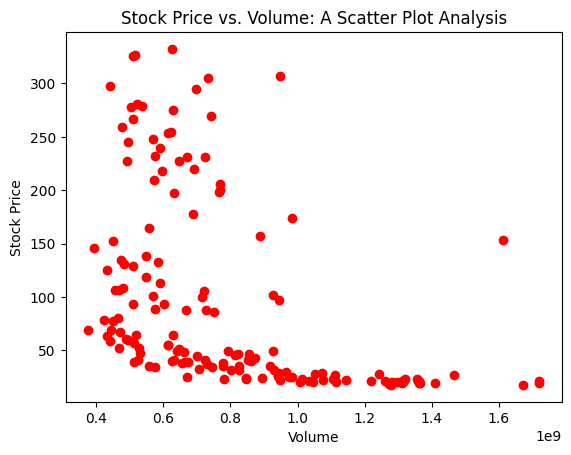

In [ ]:
plt.scatter(st["Volume"], st["Adj Close"],color='r')
plt.title("Stock Price vs. Volume: A Scatter Plot Analysis")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig('Correlation Coefficeint') #To download this plot

# **Regression analysis**

### Manually

In [ ]:
Y=st[["Adj Close"]].copy()
X=st[["Volume"]].copy()

In [ ]:
X["intercept"]=1
X=X[["Volume","intercept"]]

In [ ]:
X_T=X.T
B=np.linalg.inv(X_T @ X) @ X_T @ Y

In [ ]:
B

,Adj Close
0,2.064534e-08
1,7.921688e+01


### With the help of  Function

In [ ]:
x=st[["Volume"]].copy()

In [ ]:
y=st[["Adj Close"]].copy()

In [ ]:
regressor=LinearRegression()
result1=regressor.fit(x,y)

In [ ]:
y_predict1=result1.predict(x)

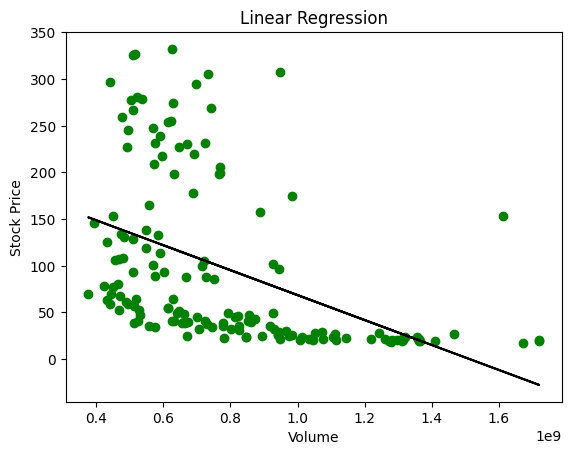

In [ ]:
plt.scatter(x,y,color='g')
plt.plot(x,y_predict1,color='k')
plt.title("Linear Regression")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig("Linear Regression")

# **Outliers**

### Drawing Leverage Plot

In [ ]:
model = sm.OLS(y, sm.add_constant(x)).fit()

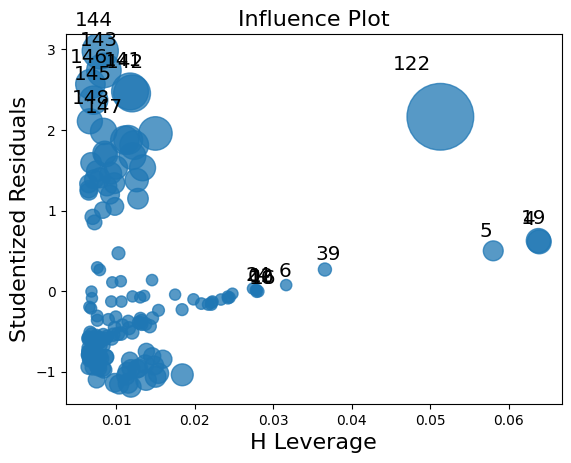

In [ ]:
sm.graphics.influence_plot(model)
plt.savefig("Leverage plots")

### Removing outliers

In [ ]:
stand_resids = model.resid_pearson

In [ ]:
newst=st

newst=pd.concat([newst,pd.DataFrame(stand_resids)],axis=1)
newst=newst.rename(columns={0:"stand_resids"})

In [ ]:
newst

,Adj Close,Volume,stand_resids
0,21.509577,1359650900,0.012266
1,21.883593,1074643300,-0.459152
2,22.461380,1110237200,-0.392471
3,23.419954,1319029500,-0.031708
4,19.785032,1720130200,0.592874
...,...,...,...
151,259.532898,477157600,1.513652
152,231.665237,575586600,1.329697
153,230.899323,671225100,1.479883
154,253.787338,615296000,1.672581


In [ ]:
newst.to_csv("WithOutliers.csv")

In [ ]:
newst.drop(newst[(newst['stand_resids'] >= 1.90) | (newst['stand_resids'] <= -1.90) ].index, inplace = True)

In [ ]:
newst

,Adj Close,Volume,stand_resids
0,21.509577,1359650900,0.012266
1,21.883593,1074643300,-0.459152
2,22.461380,1110237200,-0.392471
3,23.419954,1319029500,-0.031708
4,19.785032,1720130200,0.592874
...,...,...,...
151,259.532898,477157600,1.513652
152,231.665237,575586600,1.329697
153,230.899323,671225100,1.479883
154,253.787338,615296000,1.672581


In [ ]:
newst.to_csv("RemovedOutliers.csv")

### Making the data ready

In [ ]:
newx=newst[["Volume"]].copy()

In [ ]:
newy=newst[["Adj Close"]].copy()

### New Leverage Plot

In [ ]:
newmodel = sm.OLS(newy, sm.add_constant(newx)).fit()

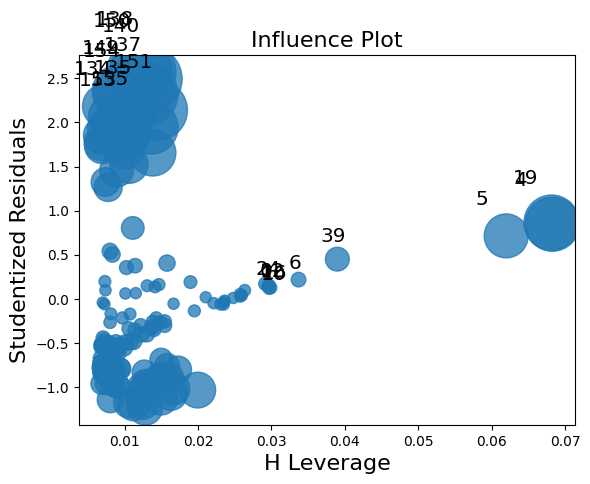

In [ ]:
sm.graphics.influence_plot(newmodel)
plt.savefig("After Removing Leverage PLot")

### New Correlation Coefficient

In [ ]:
newst["Adj Close"].corr(newst["Volume"])

-0.5142469001515385

###**Linear** Regression

In [ ]:
result2 = regressor.fit(newx,newy)

In [ ]:
result2.coef_

array([[-1.26068971e-07]])

In [ ]:
result2.intercept_

array([183.40576376])

In [ ]:
ypredict2=result2.predict(newx)

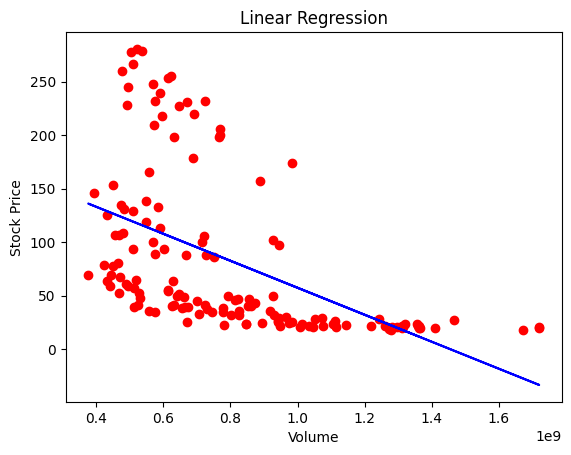

In [ ]:
plt.scatter(newx,newy,color='r')
plt.plot(newx,ypredict2,color='b')
plt.title("Linear Regression")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig("New Linear Regression")